In [190]:
import sys, os
sys.path.insert(1,"/opt/lumerical/v221/api/python/") #Default linux lumapi path
#sys.path.append(os.path.dirname("/media/lucas/datam01/LucasLobo/Design_MMI_LucasLobo/python")) 
import  lumapi
import matplotlib.pyplot as plt
import numpy as np
#import opencv
from scipy import ndimage
import math

In [193]:
mode = lumapi.MODE(filename= 'MMI2XN.lms')



In [194]:
mode.emepropagate()

In [132]:
campo = mode.getresult('EME','user s matrix')
campo = abs(campo)**2
campo = 10*np.log10(campo)
[print(*line) for line in campo]


-55.81582637241772 -64.11767753674926 -6.6284121989814 -5.953277589427125 -6.442924263488264 -5.9057763309194105
-64.11738407839955 -55.81596869460395 -5.90577544457065 -6.4429221513986565 -5.953278552468686 -6.628412604913124
-6.616112406116042 -5.8995626764960285 -47.09184575831217 -52.15564763273449 -50.844123144974944 -51.37532100291026
-5.949488359675474 -6.434602529608714 -48.55141382746928 -41.97985342512887 -40.484352261479735 -50.67310133959544
-6.434604634169386 -5.9494887501066085 -50.67306755939589 -40.484348165981814 -41.97987339632704 -48.5513643172428
-5.8995627148160406 -6.616112717567638 -51.37531248541525 -50.84412359200863 -52.15563688486468 -47.09183563187513


[None, None, None, None, None, None]

In [134]:
mode.setemeanalysis("mode convergence sweep", 1)
mode.emesweep("mode convergence sweep")
modos = mode.getemesweep("S_mode_convergence_sweep");

dict_keys(['modes', 's11', 's21', 's31', 's41', 's51', 's61', 's12', 's22', 's32', 's42', 's52', 's62', 's13', 's23', 's33', 's43', 's53', 's63', 's14', 's24', 's34', 's44', 's54', 's64', 's15', 's25', 's35', 's45', 's55', 's65', 's16', 's26', 's36', 's46', 's56', 's66', 'Lumerical_dataset'])


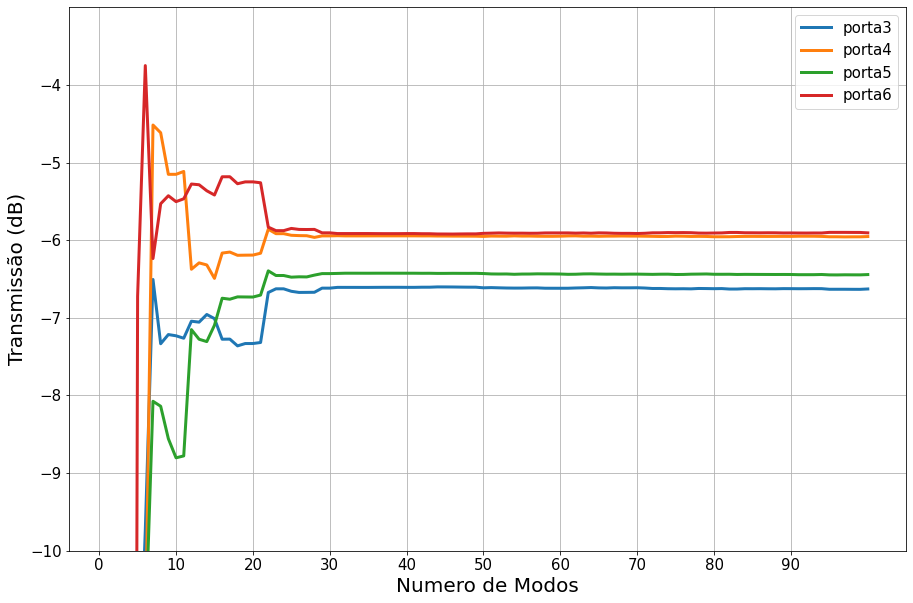

In [169]:
plt.rcParams["figure.figsize"] = (15,10)
print(modos.keys())
x = modos['modes']
s13 = modos['s13']
s14 = modos['s14']
s15 = modos['s15']
s16 = modos['s16']

plt.plot(x,10*np.log10(abs(s13)**2),label='porta3',linewidth=3)
plt.plot(x,10*np.log10(abs(s14)**2),label='porta4',linewidth=3)
plt.plot(x,10*np.log10(abs(s15)**2),label='porta5',linewidth=3)
plt.plot(x,10*np.log10(abs(s16)**2),label='porta6',linewidth=3)
plt.legend(fontsize=15)
plt.ylim(-10,-3)
plt.yticks(np.arange(-10,-3,step=1),fontsize=15)
plt.xticks(np.arange(0,100,step=10),fontsize=15)
plt.xlabel('Numero de Modos',fontsize=20)
plt.ylabel('Transmissão (dB)',fontsize=20)
plt.grid()

In [171]:
mode.setemeanalysis("wavelength sweep",1)
mode.emesweep("wavelength sweep")
comprimentos = mode.getemesweep("S_wavelength_sweep")

dict_keys(['wavelength', 's11', 's21', 's31', 's41', 's51', 's61', 's12', 's22', 's32', 's42', 's52', 's62', 's13', 's23', 's33', 's43', 's53', 's63', 's14', 's24', 's34', 's44', 's54', 's64', 's15', 's25', 's35', 's45', 's55', 's65', 's16', 's26', 's36', 's46', 's56', 's66', 'Lumerical_dataset'])


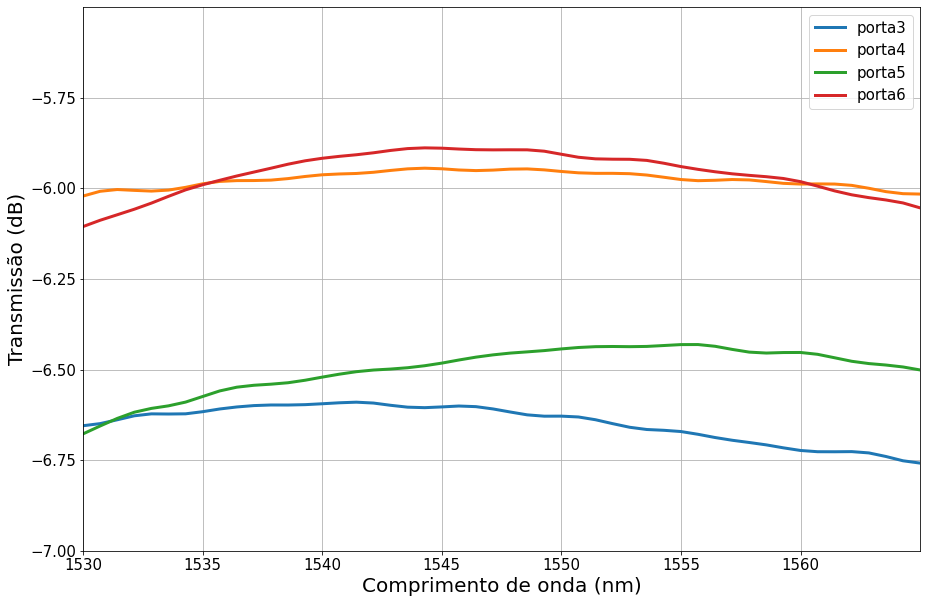

In [189]:
plt.rcParams["figure.figsize"] = (15,10)
print(comprimentos.keys())
x = comprimentos['wavelength']
s13 = comprimentos['s13']
s14 = comprimentos['s14']
s15 = comprimentos['s15']
s16 = comprimentos['s16']

plt.plot(x*1e9,10*np.log10(abs(s13)**2),label='porta3',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s14)**2),label='porta4',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s15)**2),label='porta5',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s16)**2),label='porta6',linewidth=3)
plt.legend(fontsize=15)
plt.ylim(-7,-5.5)
plt.xlim(1530,1565)
plt.yticks(np.arange(-7,-5.5,step=0.25),fontsize=15)
plt.xticks(np.arange(1530,1565,step=5),fontsize=15)
plt.xlabel('Comprimento de onda (nm)',fontsize=20)
plt.ylabel('Transmissão (dB)',fontsize=20)
plt.grid()